Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [10]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 10, 1, 3, 8, 13, 5, 5, 3, 10, 11, 3…
$ Glucose                  <dbl> 85, 89, 115, 139, 103, 126, 99, 145, 117, 109…
$ BloodPressure            <dbl> 66, 66, 0, 80, 30, 88, 84, 82, 92, 75, 58, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 19, 0, 26, 11, 31, 0…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 110, 0, 0, 54, 0, 0,…
$ BMI                      <dbl> 26.6, 28.1, 35.3, 27.1, 43.3, 39.3, 35.4, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 29, 57, 33, 27, 50, 57, 38, 60, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

A: The outcome variable is just titled "Outcome" here. This is the dummy variable that represents whether an individual has diabetes or not.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

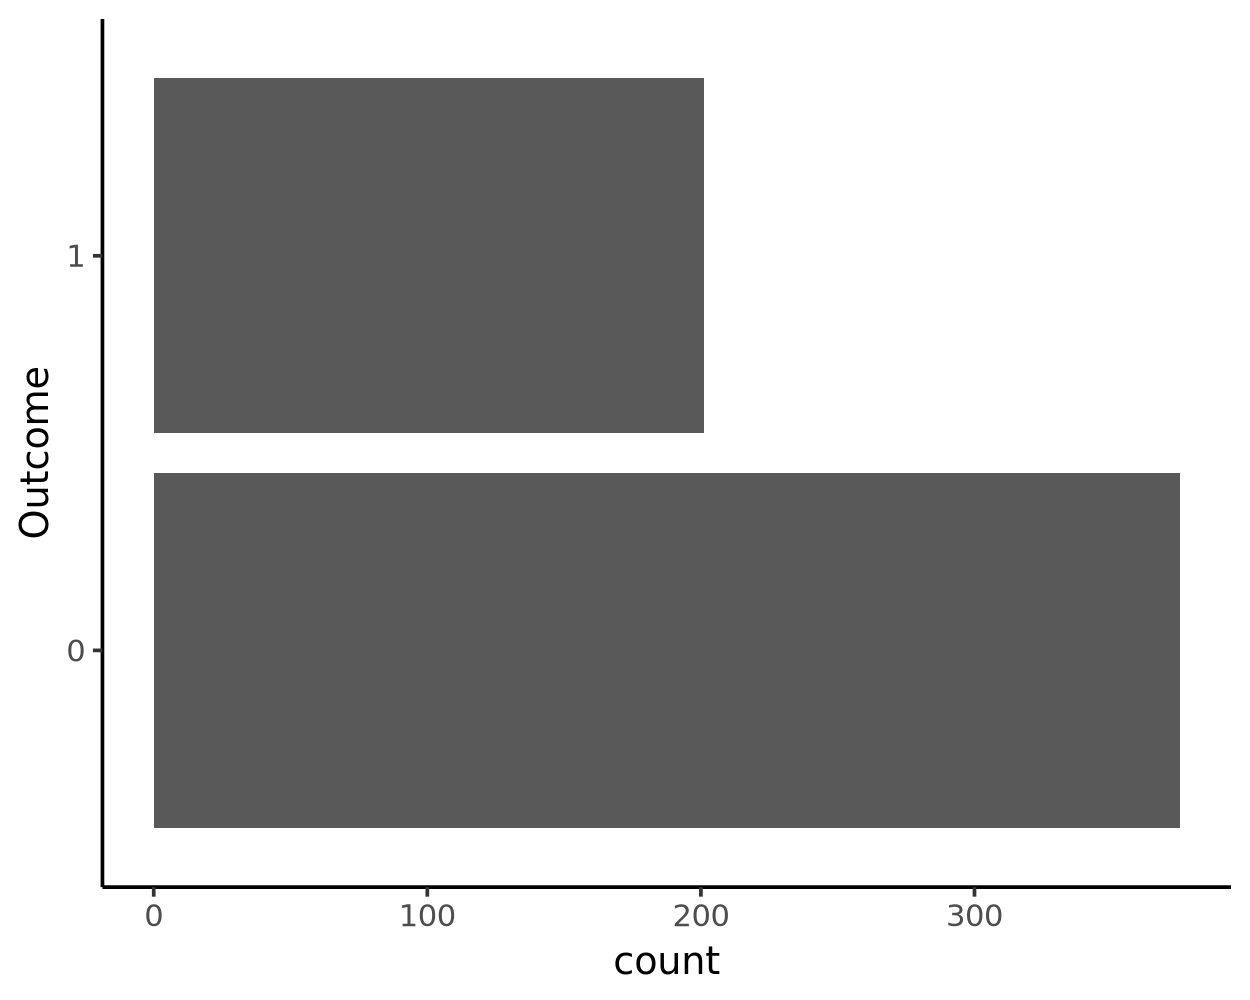

In [50]:
ggplot(diabetes_train, aes(y = Outcome)) + 
    geom_bar() +
    theme_classic()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

A: Not at all, there are about twice as many "0" outcomes as "1" outcomes. Or, twice as many without diabetes as with diabetes.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [16]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

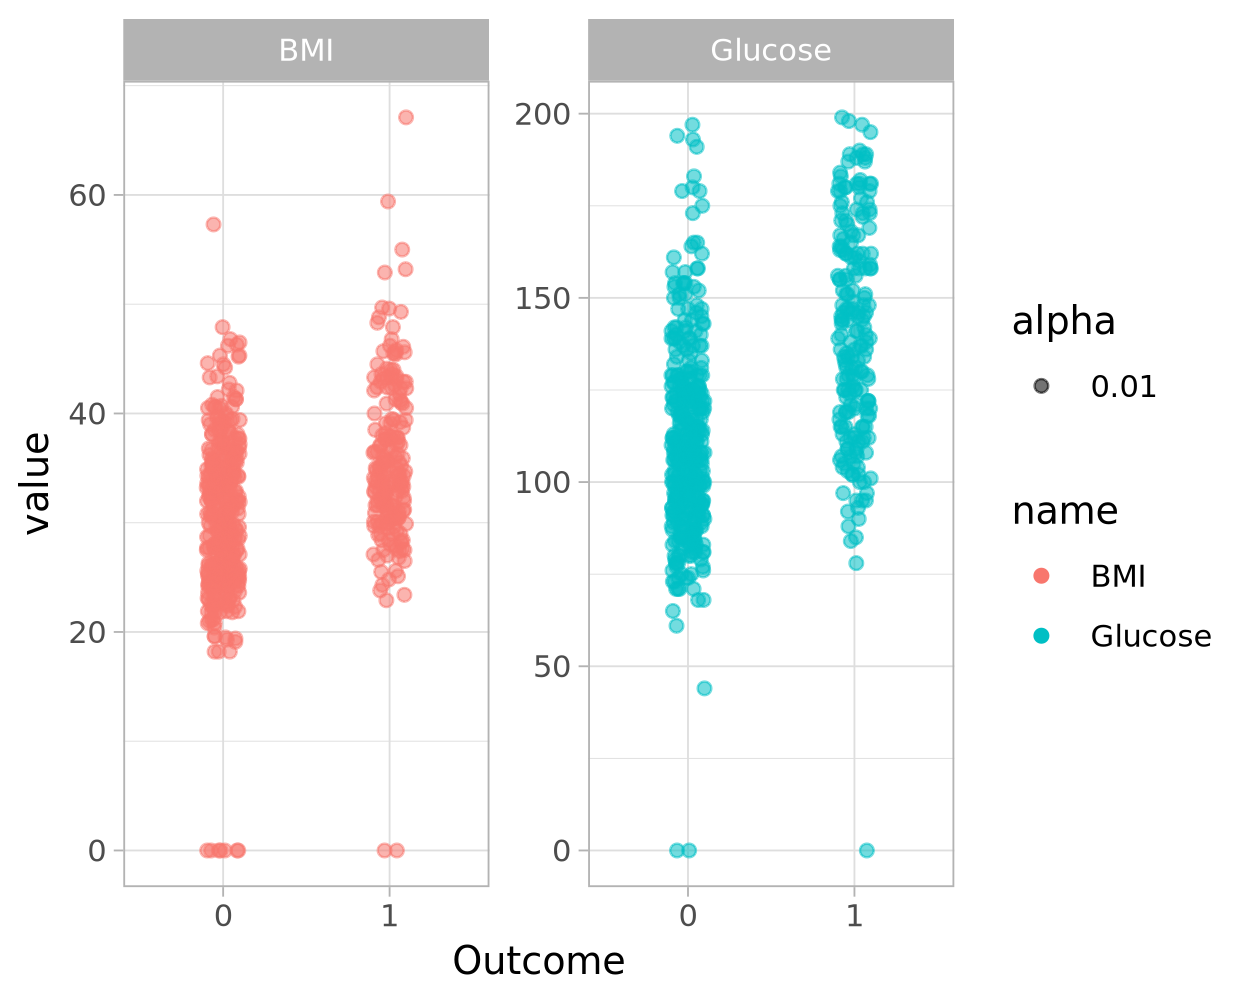

In [65]:
ggplot(plot_df, aes(y = value, x = Outcome, color = name, alpha = 0.01)) +
    theme_light() +
    geom_jitter(width = 0.1, height = 0) +
    facet_wrap(~name, ncol = 2, scales = 'free_y')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**


*Note: Since I displayed my graph vertically, I'm switching free-y for free-x.*

A: As shown below, without specifying "free-y", the y-axis scale for the two facets will be the same. This makes the charts less legible in this case.

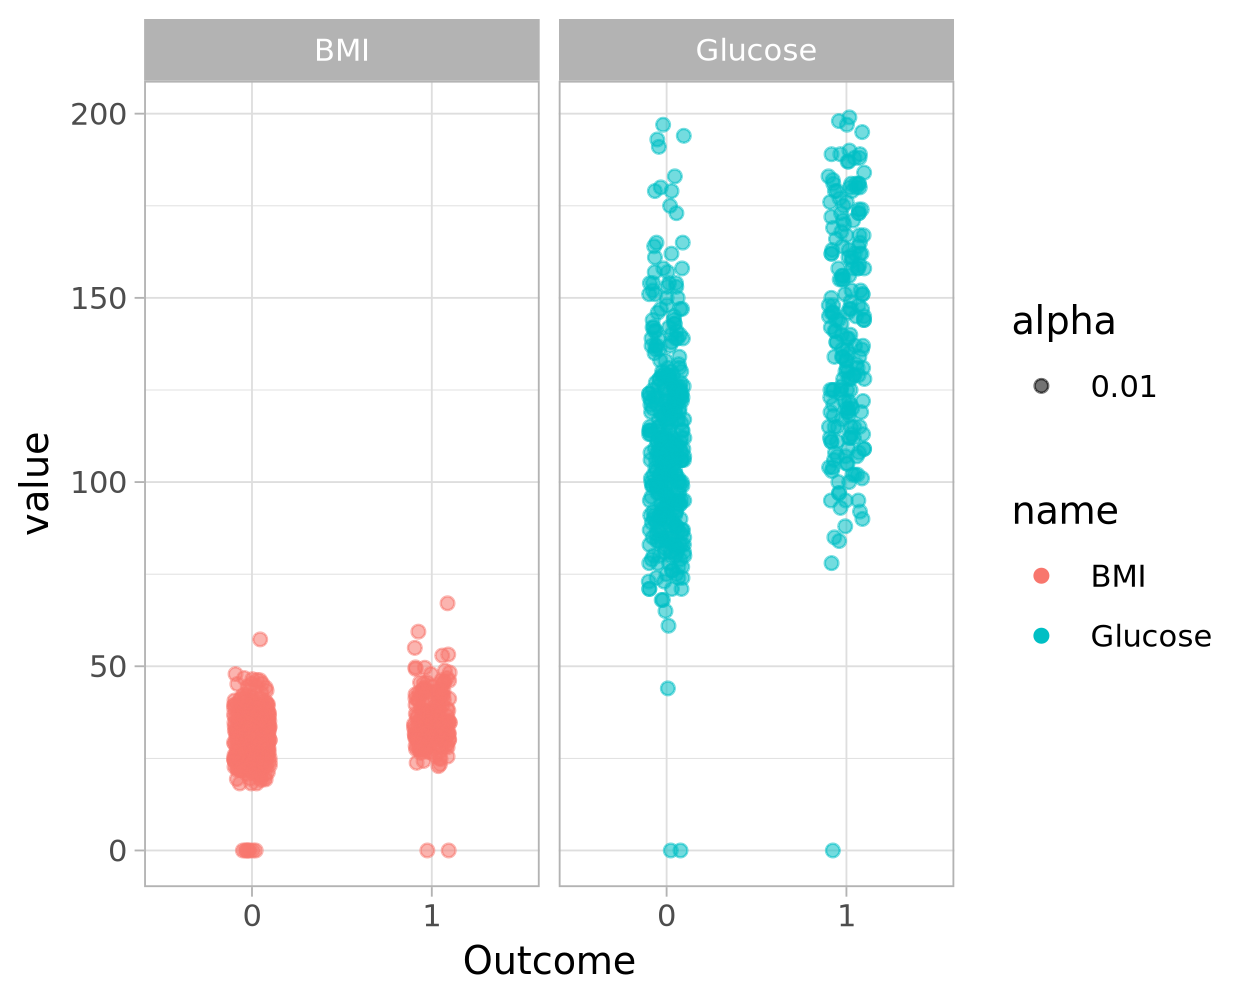

In [64]:
ggplot(plot_df, aes(y = value, x = Outcome, color = name, alpha = 0.01)) +
    theme_light() +
    geom_jitter(width = 0.1, height = 0) +
    facet_wrap(~name, ncol = 2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [67]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.65936      0.08285      0.03463  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 582.1 	AIC: 588.1

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [75]:
diabetes_test_wPred <- augment(mod_fit, diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [78]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  31
         1  17  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

A:

-In the test data, 67 individuals had diabetes.

-36 of those individuals were predicted to be positive by our model.

-17 individuals were false-positives.

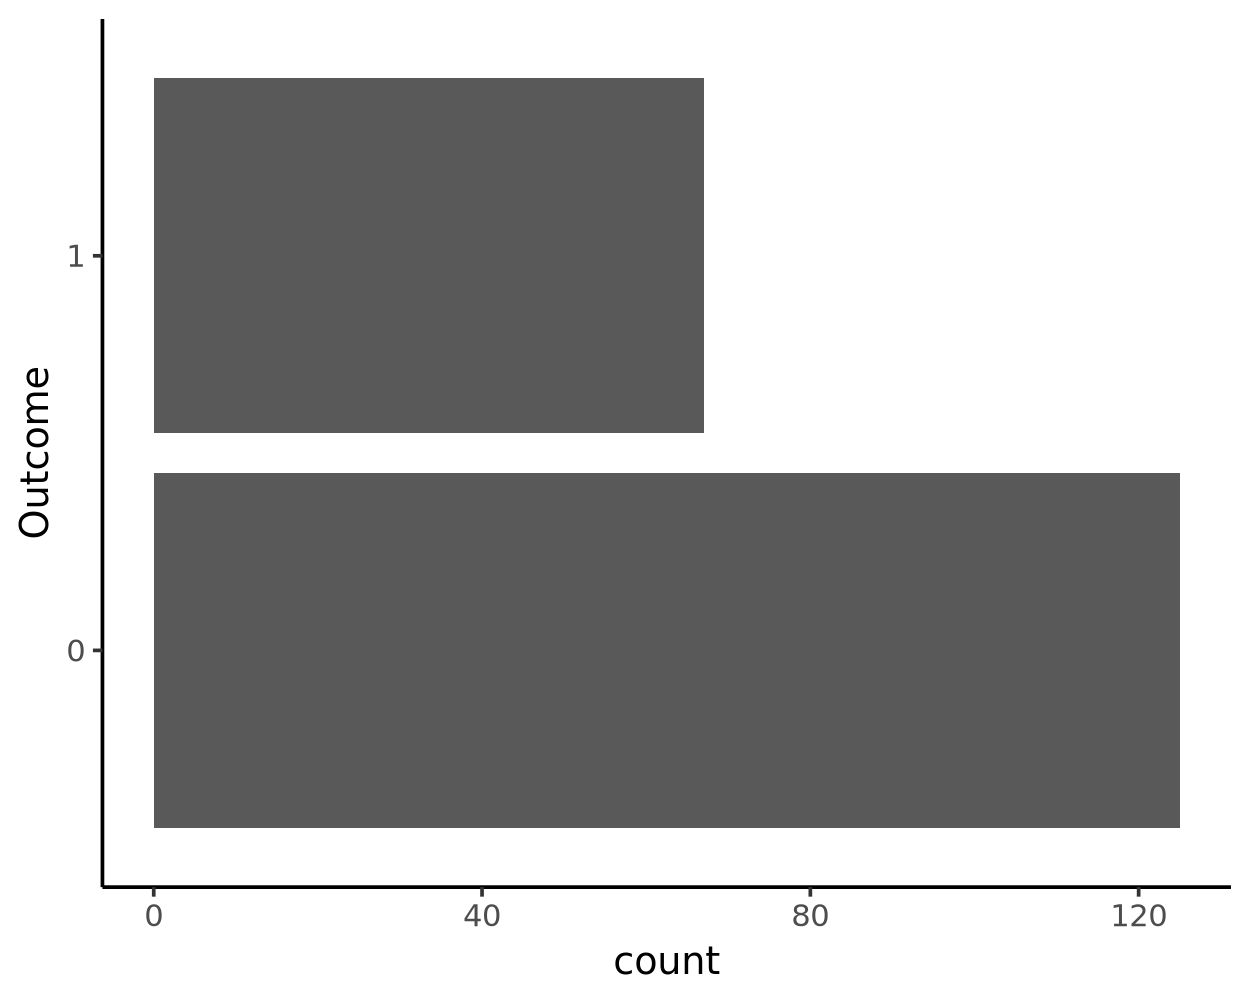

In [77]:
ggplot(diabetes_test, aes(y = Outcome)) + 
    geom_bar() +
    theme_classic()